In [2]:
# code to upload the dataset file

from google.colab import files

uploaded = files.upload()

Saving MSFT.csv to MSFT.csv


In [3]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['MSFT.csv']))
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400
...,...,...,...,...,...,...,...
9688,2024-08-22,424.359985,426.790009,414.609985,415.549988,415.549988,19361900
9689,2024-08-23,416.980011,419.260010,412.089996,416.790009,416.790009,18493800
9690,2024-08-26,416.369995,417.279999,411.339996,413.489990,413.489990,13152800
9691,2024-08-27,412.859985,414.359985,410.250000,413.839996,413.839996,13492900


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9688,2024-08-22,415.549988
9689,2024-08-23,416.790009
9690,2024-08-26,413.489990
9691,2024-08-27,413.839996


In [5]:
df['Date']

,Date
0,1986-03-13
1,1986-03-14
2,1986-03-17
3,1986-03-18
4,1986-03-19
...,...
9688,2024-08-22
9689,2024-08-23
9690,2024-08-26
9691,2024-08-27


In [6]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2023-08-29')
datetime_object

datetime.datetime(2023, 8, 29, 0, 0)

In [7]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9688,2024-08-22,415.549988
9689,2024-08-23,416.790009
9690,2024-08-26,413.489990
9691,2024-08-27,413.839996


In [8]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-8-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Date
0,1986-03-13
1,1986-03-14
2,1986-03-17
3,1986-03-18
4,1986-03-19
...,...
9688,2024-08-22
9689,2024-08-23
9690,2024-08-26
9691,2024-08-27


In [9]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-08-22,415.549988
2024-08-23,416.790009
2024-08-26,413.489990


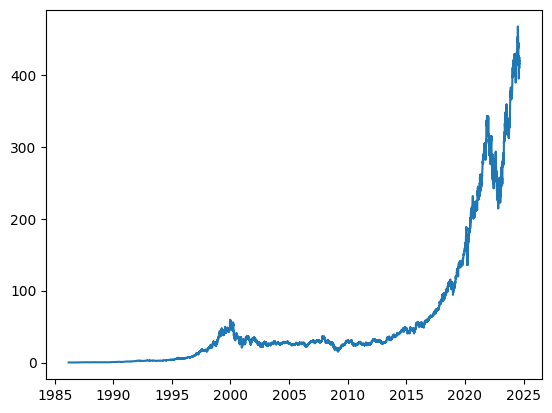

In [10]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [11]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2023-08-29'
windowed_df = df_to_windowed_df(df,
                                '2023-08-29',
                                '2024-08-28',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-08-29,319.970001,322.980011,323.700012,328.410004
1,2023-08-30,322.980011,323.700012,328.410004,328.790009
2,2023-08-31,323.700012,328.410004,328.790009,327.760010
3,2023-09-01,328.410004,328.790009,327.760010,328.660004
4,2023-09-05,328.790009,327.760010,328.660004,333.549988
...,...,...,...,...,...
247,2024-08-22,421.529999,424.799988,424.140015,415.549988
248,2024-08-23,424.799988,424.140015,415.549988,416.790009
249,2024-08-26,424.140015,415.549988,416.790009,413.489990
250,2024-08-27,415.549988,416.790009,413.489990,413.839996


In [12]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

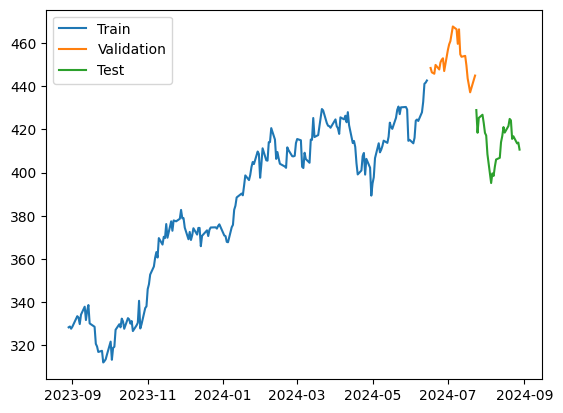

In [13]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 151000.8906 - mean_absolute_error: 386.9785 - val_loss: 204787.8750 - val_mean_absolute_error: 452.4653
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 148818.9688 - mean_absolute_error: 384.0170 - val_loss: 204189.7812 - val_mean_absolute_error: 451.8040
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 146621.2969 - mean_absolute_error: 381.1422 - val_loss: 203781.4219 - val_mean_absolute_error: 451.3518
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 147882.3281 - mean_absolute_error: 382.9387 - val_loss: 203365.8438 - val_mean_absolute_error: 450.8912
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 148867.6406 - mean_absolute_error: 384.2571 - val_loss: 202924.6875 - val_mean_absolute_error: 450.4017
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 147184.0625 - mean_absolute_error: 381.8231 - val_loss: 202448.7344 - val_mean_absolute_error: 449.8730
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


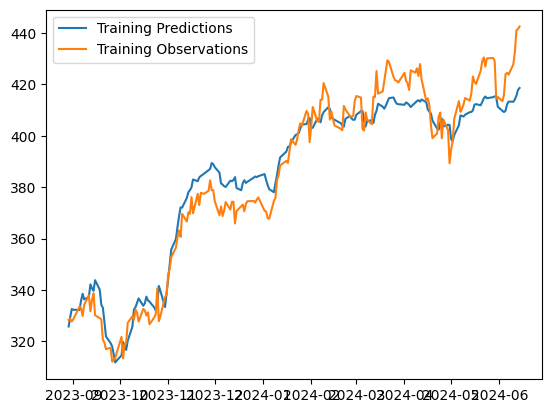

In [15]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


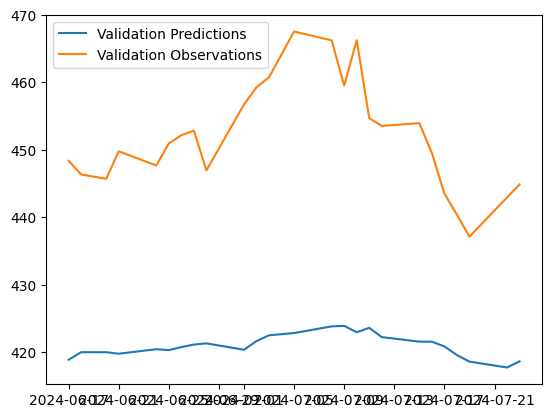

In [16]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


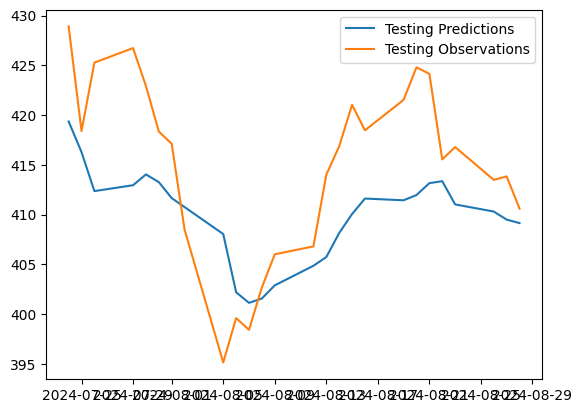

In [17]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

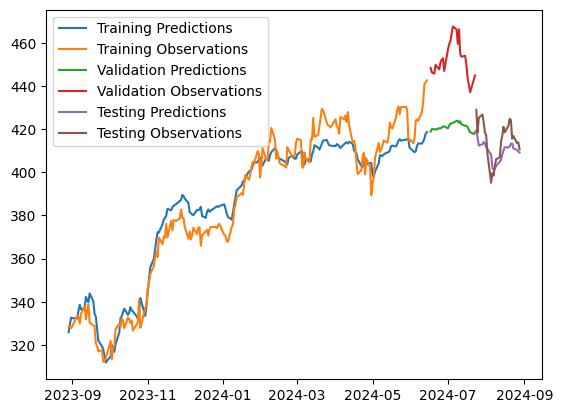

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [19]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])
last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
  next_prediction=model.predict(np.array([last_window[-3:]])).flatten()
  recursive_predictions.append(next_prediction)
  last_window=np.concatenate((last_window,[next_prediction]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

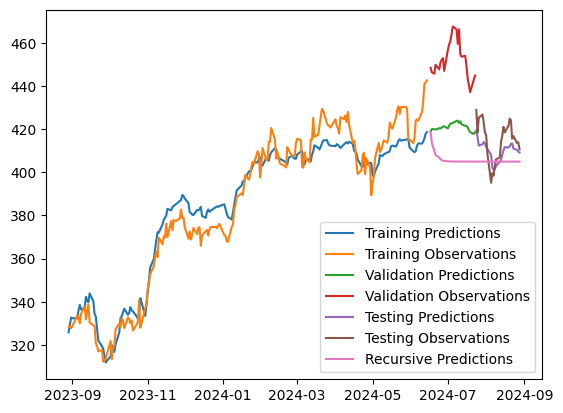

In [20]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, test_predictions)

# Assuming accuracy is 1-MAPE
accuracy = 1 - mape
print('Accuracy:', accuracy)

Accuracy: 0.9843462072312832


In [22]:
# Ebrahim Dewaswala

In [23]:
# 2024